# Capstone Project - The Battle of Neighborhoods

# Rented Flats Analysis for different locations in Mumbai, along with exploration of near by Venues

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">
<font size = 3>
    
1.  <a href="#item1">Introduction/Business Problem</a>    
    
2.  <a href="#item2">Data</a> 
    
3.  <a href="#item3">Methodology</a>  
    
4.  <a href="#item4">Results</a> 
    
5.  <a href="#item5">Discussion</a> 
    
6.  <a href="#item6">Conclusion</a> 
    
7.  <a href="#item7">References</a> 
    
    </font>
</div>

## 1. Introduction/Business Problem Dataset <a class="anchor" id="item1"></a>

__Mumbai__ is the financial, commercial, and the entertainment capital of __India__. It is also one of the world's top ten centres of commerce in terms of global financial flow. The city houses important financial institutions and the corporate headquarters of numerous Indian companies and multinational corporations. It is also home to some of India's premier scientific and nuclear institutes. As a resident of this city, I decided to use Mumbai in my project. The city is divided into __8 regions__ in total (i.e. Central Mumbai, Thane District, Eastern Mumbai, Western Mumbai, South West Mumbai, South Mumbai, Harbour Lines, Navi Mumbai).

Being the center of Multiple institutions and companies, it is sometime required for people to move to Mumbai for personal and professional growth. People coming to this city are from different backgrounds, some have money to spend and some are coming to earn some money. Hence while searching for rented flats, they need to consider their financial capabilities, family size (if moving with family) and location of their work. After all these consideration, they can choose the area in their interested location and type of flats they wanted to stay.

In this project, we consider all these problems and we will try to find an optimal location and area to stay. We will create maps and information charts for different locations of Mumbai and each locations is clustered according to the venue categories. Advantages of each area will then be clearly expressed so that best possible final location can be chosen by stakeholders.

## 2. Data <a class="anchor" id="item2"></a>

Based on definition of our problem, we can list the datas as below:

-  __BeautifulSoup__ will be used to get the details of locations, its areas and price range of flats from _99acres_ website. Data is then cleaned and modified.
    
    
-  __Nominatim from geopy.geocoders__ option will be used to get the center coordinates of the each areas. Since Nominatim sometime doesn't provide the correct coordinates, _Google Maps_ were used to filter and modify it.
    
    
-  __Folium__ will be used to show coordinates, clusters and price ranges of different type of flat in Maps
    
    
-  __Foursquare API__ will be used to get the most common venues of all the available areas of different Locations of Mumbai
    
    
-  __K-Means__ clustering will be used to divide venues in different clusters
    
    
-  __Bar Charts__ and __Histograms__ will be used to show the details of venues, clusters and prices


## 3. Methodology <a class="anchor" id="item3"></a>

In this section, We will fetch the data from a website using _BeautifulSoup_. 
Once data is available, we will clean the data using _python_ library functions.

Latitude and Longitude for all the available areas will be fetched using _geocoder_. 
All those areas will be removed, whose coordinates are found using Geocoder.

Venue details for all the areas in the defined Radius will be fetched using _Foursquare API_.

K-Means algorithm was used for Clustering.

### Before we get the data and start exploring it, let's download and import all the dependencies that we will need.

In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests

# Matplotlib and associated plotting modules
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
import branca.colormap as bcm

!pip install bs4
from bs4 import BeautifulSoup

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Libraries imported.


### Get Dataset using BeautifulSoup

In order to identify price range of different types of flats (i.e. 1-BHK, 2-BHK, 3-BHK) of different areas of different locations in _Mumbai_, first we have to fetch the data from some website which is all of these data. In this project, I used __99acres__ website to fetch the dataset

In [2]:
url1="https://www.99acres.com/property-rates-and-price-trends-in-mumbai#"
rent_data  = requests.get(url1).text

rent_soup = BeautifulSoup(rent_data, 'html5lib')

### Explore and transfrom the data fetched using BeautifulSoup from website

Get the first row of table to analyse the data

In [3]:
rent_soup.find("table").find("tbody").find_all('tr')[1].find_all('td')

[<td class="tl">Anand Nagar</td>,
 <td><span class="WebRupeesmall">Rs. </span>8,245 - 9,520/sq. ft.</td>,
 <td>0.97%                                             <img alt="" class="vmid" src="/images/icons/greenUp.gif"/>
                                         </td>,
 <td>
                                             <div class="bLink textC" href="javascript:void(0);" onclick="ptr.openPriceTrendLayer('12400','0','1','S','0','Anand Nagar',600,350)" target="_blank">See Trends</div>
                                         </td>,
 <td class="bGrey"><span class="WebRupeesmall">Rs. </span>10,200 - 12,325</td>,
 <td class="bGrey"><span class="WebRupeesmall">Rs. </span>16,306 - 19,271 </td>,
 <td class="bGrey">-</td>]

As it is visible from first row that we have Rent for different type of flats as a Range for area. We need to transform the value of Rent columns to have an average of Range. Also to store the dataset into _pandas_ dataframe 

In [4]:
rent_lst = []

for row in rent_soup.find("table").find("tbody").find_all('tr'):
    cnt1 = 0
    rent_dtls = []
    for ara in row.find_all("th"):
        lctn = ara.text.strip()

    rent_dtls.append(lctn)

    for col in row.find_all("td"):
        cnt1 += 1
        if cnt1 < 2:
            rent_dtls.append(col.text.strip())
        if cnt1 > 4:
            if(col.text.strip() != '-'):
                abc = col.text.strip().replace('Rs. ','').replace('-', '+').replace(',','').replace(' ','').split("+")
                rent_dtls.append((int(abc[0]) + int(abc[1]))/2)
            else:
                rent_dtls.append('NaN')

    if cnt1 > 0:
        rent_lst.append(rent_dtls)

mum_rent_data = pd.DataFrame(rent_lst, columns = ['Location', 'Area', '1BHK', '2BHK', '3BHK'])
print(mum_rent_data.shape)
mum_rent_data.head(3)

(888, 5)


,Location,Area,1BHK,2BHK,3BHK
0,Mumbai Thane,Anand Nagar,11262.5,17788.5,NaN
1,Mumbai Thane,Balkum,12898,17956.5,29219
2,Mumbai Thane,Balkum Pada,NaN,NaN,NaN


As you can see total of __888__ records fetch from website. 

Now, we will removing rows from dataset where their is no price range provided for all type of flats

In [5]:
index_no = mum_rent_data[ (mum_rent_data['1BHK'] == 'NaN') & (mum_rent_data['2BHK'] == 'NaN') & (mum_rent_data['3BHK'] == 'NaN')].index

mum_rent_data.drop(index_no, inplace = True)
mum_rent_data.reset_index(inplace = True, drop = True)
print(mum_rent_data.shape)

(583, 5)


After removal of rows in above step, only __583__ records remains

#### Now lets see how many unique locations were fetched from website

In [6]:
mum_rent_data['Location'].unique()

array(['Mumbai Thane', 'Mumbai Beyond Thane', 'Mira Road And Beyond',
       'Mumbai Andheri-Dahisar', 'Mumbai South West',
       'Central Mumbai suburbs', 'Mumbai Navi', 'Mumbai South',
       'Mumbai Harbour'], dtype=object)

As you can see total __9__ locations were fetched, now will modify the locations for better understanding

In [7]:
mum_rent_data["Location"].replace({"Mumbai Thane": "Thane District", "Mumbai Beyond Thane": "Eastern Mumbai"}, inplace=True)
mum_rent_data["Location"].replace({"Mira Road And Beyond": "Western Mumbai", "Mumbai Andheri-Dahisar": "Western Mumbai"}, inplace=True)
mum_rent_data["Location"].replace({"Mumbai South West": "South West Mumbai", "Central Mumbai suburbs": "Central Mumbai"}, inplace=True)
mum_rent_data["Location"].replace({"Mumbai Navi": "Navi Mumbai", "Mumbai South": "South Mumbai", "Mumbai Harbour" : "Harbour Lines"}, inplace=True)
mum_rent_data["Location"].unique()

array(['Thane District', 'Eastern Mumbai', 'Western Mumbai',
       'South West Mumbai', 'Central Mumbai', 'Navi Mumbai',
       'South Mumbai', 'Harbour Lines'], dtype=object)

#### Let's, Quickly examine the resulting dataframe.

In [8]:
print('The dataframe has {} Locations and {} Areas.'.format(len(mum_rent_data['Location'].unique()), mum_rent_data.shape[0]))
mum_rent_data.head()

The dataframe has 8 Locations and 583 Areas.


,Location,Area,1BHK,2BHK,3BHK
0,Thane District,Anand Nagar,11262.5,17788.5,NaN
1,Thane District,Balkum,12898,17956.5,29219
2,Thane District,Bhayandarpada,10333,13566,NaN
3,Thane District,Brahmand,13164.5,15369.5,23675
4,Thane District,Budhaji Nagar,10837.5,NaN,NaN


As you can see, dataset has total of __8__ different locations and total of __583__ Areas having details of Average Rent of all type of flats

__Locations are:__
-  Thane District
-  Eastern Mumbai
-  Western Mumbai
-  South West Mumbai
-  Central Mumbai
-  Navi Mumbai
-  South Mumbai
-  Harbour Lines

### Use geopy library to get the latitude and longitude values of all the Areas in dataframe.

In order to define an instance of the __geocoder__, we need to define a _user_agent_. We will name our agent _foursquare_agent_, as shown below. 
If exception occurred while fetching coordinates of any area, those area will be removed from dataset and new dataframe is created named __mum_lctns__. 
Additionally Latitude and Longitude data type will be modified to float, since it could be used for some implementation.

In [9]:
mum_ll = []

for lc, ar, b1, b2, b3 in zip(mum_rent_data['Location'], mum_rent_data['Area'], mum_rent_data['1BHK'], mum_rent_data['2BHK'], mum_rent_data['3BHK']):
    try:
        address = ar+', Mumbai, Maharashtra'

        geolocator = Nominatim(user_agent="foursquare_agent")
        location = geolocator.geocode(address)
        lat = location.latitude
        lng = location.longitude
        mum_ll.append([lc, ar, lat, lng, b1, b2, b3]) 
    except:
        pass
        #print("Coordinates not found for {}".format(address))

mum_lctns = pd.DataFrame(mum_ll)
mum_lctns.columns = ['Location', 'Area', 'Latitude', 'Longitude', '1BHK', '2BHK', '3BHK']

mum_lctns['Latitude'] = mum_lctns['Latitude'].astype(float)
mum_lctns['Longitude'] = mum_lctns['Longitude'].astype(float)
print(mum_lctns.shape)
print(mum_lctns.columns)
mum_lctns.head()

(444, 7)
Index(['Location', 'Area', 'Latitude', 'Longitude', '1BHK', '2BHK', '3BHK'], dtype='object')


,Location,Area,Latitude,Longitude,1BHK,2BHK,3BHK
0,Thane District,Anand Nagar,19.099383,72.911593,11262.5,17788.5,NaN
1,Thane District,Balkum,19.225776,72.987741,12898,17956.5,29219
2,Thane District,Brahmand,19.246965,72.981841,13164.5,15369.5,23675
3,Thane District,Casa Bella,19.161070,72.944383,7459,NaN,NaN
4,Thane District,Charai,19.075990,72.877393,15286.5,NaN,NaN


After fetching coordinates of all the areas, some of areas were removed as coordinates were not available. Now, total available areas are __444__.

### Now we will explore Maps of all the locations and analyse the coordinates

First, we will define a function to show map based on the given input. It will be useful since we have to perform same operation multiple time.
We use __folium__ to show areas in Map. Folium is a great visualization library.

In [10]:
def get_map(lctns, areas, lats, lngs, zm):
    # create map using latitude and longitude values
    map_mum = folium.Map(location=[latitude, longitude], zoom_start=zm)

    # add markers to map
    for lctn, area, lat, lng in zip(lctns, areas, lats, lngs):
        label = '{}, {}'.format(area, lctn)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='blue',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.7,
            parse_html=False).add_to(map_mum)  

    return map_mum

#### Use geopy library to get the latitude and longitude values of Mumbai

In [11]:
address = 'Mumbai, Maharashtra'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Mumbai are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Mumbai are 19.0759899, 72.8773928.


#### Now we start exploring all 8 locations one by one

Create and explore map of __Eastern Mumbai__ with Areas superimposed on top.

In [12]:
df_lctn_wise = mum_lctns[mum_lctns['Location'] == 'Eastern Mumbai']
lctn_map = get_map(df_lctn_wise['Location'], df_lctn_wise['Area'], df_lctn_wise['Latitude'], df_lctn_wise['Longitude'], 10)
lctn_map

#### As visible on map, coordinates of some of the areas are incorrect. We will filter and modify those Cordinates using Google Maps

In [13]:
print(mum_lctns.shape)
mum_lctns.loc[mum_lctns["Area"] == 'Kharegaon', 'Location'] = 'Thane District'
mum_lctns.loc[mum_lctns["Area"] == 'Mumbra', 'Location'] = 'Thane District'
mum_lctns.loc[mum_lctns["Area"] == 'Diva', 'Location'] = 'Thane District'
mum_lctns.loc[mum_lctns["Area"] == 'Rambaug', 'Latitude'] = 19.2423205
mum_lctns.loc[mum_lctns["Area"] == 'Rambaug', 'Longitude'] = 73.1321844
mum_lctns.loc[mum_lctns["Area"] == 'Shastri Nagar', 'Latitude'] = 19.2878463
mum_lctns.loc[mum_lctns["Area"] == 'Shastri Nagar', 'Longitude'] = 73.0672189
mum_lctns.loc[mum_lctns["Area"] == 'Radha Nagar', 'Latitude'] = 19.2559616
mum_lctns.loc[mum_lctns["Area"] == 'Radha Nagar', 'Longitude'] = 73.1376176
mum_lctns.loc[mum_lctns["Area"] == 'Kalyan (West)', 'Latitude'] = 19.2441397
mum_lctns.loc[mum_lctns["Area"] == 'Kalyan (West)', 'Longitude'] = 73.1217278
mum_lctns.loc[mum_lctns["Area"] == 'Ganesh Nagar', 'Latitude'] = 19.2241506
mum_lctns.loc[mum_lctns["Area"] == 'Ganesh Nagar', 'Longitude'] = 73.1374167
mum_lctns.loc[mum_lctns["Area"] == 'Thakurwadi', 'Latitude'] = 19.2236301
mum_lctns.loc[mum_lctns["Area"] == 'Thakurwadi', 'Longitude'] = 73.0425356
mum_lctns.loc[mum_lctns["Area"] == 'Kalyan (East)', 'Latitude'] = 19.2284943
mum_lctns.loc[mum_lctns["Area"] == 'Kalyan (East)', 'Longitude'] = 73.1229685
print(mum_lctns.shape)

(444, 7)
(444, 7)


Let's see, all the areas of __Eastern Mumbai__ are correctly visible or not.

In [14]:
df_lctn_wise = mum_lctns[mum_lctns['Location'] == 'Eastern Mumbai']
lctn_map = get_map(df_lctn_wise['Location'], df_lctn_wise['Area'], df_lctn_wise['Latitude'], df_lctn_wise['Longitude'], 10)
lctn_map

Finally, latitide and longitude of areas of __Eastern Mumbai__ is correct

Create and explore map of __Thane District__ with Areas superimposed on top.

In [15]:
df_lctn_wise = mum_lctns[mum_lctns['Location'] == 'Thane District']
lctn_map = get_map(df_lctn_wise['Location'], df_lctn_wise['Area'], df_lctn_wise['Latitude'], df_lctn_wise['Longitude'], 10)
lctn_map

As visible on map, coordinates of some of the areas are incorrect. We will filter and modify those Cordinates using Google Maps

In [16]:
print(mum_lctns.shape)
mum_lctns.drop(mum_lctns[mum_lctns['Area'] == 'G B Road'].index, inplace = True)
mum_lctns.drop(mum_lctns[mum_lctns['Area'] == 'Shirgaon'].index, inplace = True)
mum_lctns.drop(mum_lctns[mum_lctns['Area'] == 'Kopara'].index, inplace = True)
mum_lctns.drop(mum_lctns[mum_lctns['Area'] == 'Thane West'].index, inplace = True)
mum_lctns.reset_index(inplace=True, drop=True)
mum_lctns.loc[mum_lctns["Area"] == 'Louis Wadi', 'Latitude'] = 19.20886565
mum_lctns.loc[mum_lctns["Area"] == 'Louis Wadi', 'Longitude'] = 72.9716742603116
mum_lctns.loc[mum_lctns["Area"] == 'Lokmanya Nagar', 'Latitude'] = 19.2121802
mum_lctns.loc[mum_lctns["Area"] == 'Lokmanya Nagar', 'Longitude'] = 72.951166
mum_lctns.loc[mum_lctns["Area"] == 'Samata Nagar', 'Latitude'] = 19.2064298
mum_lctns.loc[mum_lctns["Area"] == 'Samata Nagar', 'Longitude'] = 72.962123022833
mum_lctns.loc[mum_lctns["Area"] == 'Kopri', 'Latitude'] = 19.1864712
mum_lctns.loc[mum_lctns["Area"] == 'Kopri', 'Longitude'] = 72.9754339
mum_lctns.loc[mum_lctns["Area"] == 'Casa Bella', 'Latitude'] = 19.1678716
mum_lctns.loc[mum_lctns["Area"] == 'Casa Bella', 'Longitude'] = 73.0679372
mum_lctns.loc[mum_lctns["Area"] == 'Kailash Nagar', 'Latitude'] = 19.2246851
mum_lctns.loc[mum_lctns["Area"] == 'Kailash Nagar', 'Longitude'] = 72.9753871
mum_lctns.loc[mum_lctns["Area"] == 'Vasant Vihar', 'Latitude'] = 19.2236435
mum_lctns.loc[mum_lctns["Area"] == 'Vasant Vihar', 'Longitude'] = 72.9630442
mum_lctns.loc[mum_lctns["Area"] == 'Vartak Nagar', 'Latitude'] = 19.2108838
mum_lctns.loc[mum_lctns["Area"] == 'Vartak Nagar', 'Longitude'] = 72.9537616
mum_lctns.loc[mum_lctns["Area"] == 'Naupada', 'Latitude'] = 19.1885469
mum_lctns.loc[mum_lctns["Area"] == 'Naupada', 'Longitude'] = 72.9615568
mum_lctns.loc[mum_lctns["Area"] == 'Laxmi Nagar', 'Latitude'] = 19.2144506
mum_lctns.loc[mum_lctns["Area"] == 'Laxmi Nagar', 'Longitude'] = 72.9864326
mum_lctns.loc[mum_lctns["Area"] == 'Sainath Nagar', 'Latitude'] = 19.21411
mum_lctns.loc[mum_lctns["Area"] == 'Sainath Nagar', 'Longitude'] = 72.9785357
mum_lctns.loc[mum_lctns["Area"] == 'Anand Nagar', 'Latitude'] = 19.2647386
mum_lctns.loc[mum_lctns["Area"] == 'Anand Nagar', 'Longitude'] = 72.9603171
mum_lctns.loc[mum_lctns["Area"] == 'Thane (East)', 'Latitude'] = 19.1771794
mum_lctns.loc[mum_lctns["Area"] == 'Thane (East)', 'Longitude'] = 72.9667453
mum_lctns.loc[mum_lctns["Area"] == 'Sai Nagar', 'Latitude'] = 19.2651596
mum_lctns.loc[mum_lctns["Area"] == 'Sai Nagar', 'Longitude'] = 72.9594141
mum_lctns.loc[mum_lctns["Area"] == 'Runwal Nagar', 'Latitude'] = 19.2083377
mum_lctns.loc[mum_lctns["Area"] == 'Runwal Nagar', 'Longitude'] = 72.9708703
mum_lctns.loc[mum_lctns["Area"] == 'Hari Om Nagar', 'Latitude'] = 19.175478
mum_lctns.loc[mum_lctns["Area"] == 'Hari Om Nagar', 'Longitude'] = 72.969603
mum_lctns.loc[mum_lctns["Area"] == 'Lokpuram', 'Latitude'] = 19.2264671
mum_lctns.loc[mum_lctns["Area"] == 'Lokpuram', 'Longitude'] = 72.9667778
mum_lctns.loc[mum_lctns["Area"] == 'Charai', 'Latitude'] = 19.1979791
mum_lctns.loc[mum_lctns["Area"] == 'Charai', 'Longitude'] = 72.9701071
print(mum_lctns.shape)

(444, 7)
(440, 7)


Let's see, all the areas of __Thane District__ are correctly visible or not.

In [17]:
df_lctn_wise = mum_lctns[mum_lctns['Location'] == 'Thane District']
lctn_map = get_map(df_lctn_wise['Location'], df_lctn_wise['Area'], df_lctn_wise['Latitude'], df_lctn_wise['Longitude'], 11)
lctn_map

Finally, latitide and longitude of areas of __Thane District__ is correct

Create and explore map of __Central Mumbai__ with Areas superimposed on top.

In [18]:
df_lctn_wise = mum_lctns[mum_lctns['Location'] == 'Central Mumbai']
lctn_map = get_map(df_lctn_wise['Location'], df_lctn_wise['Area'], df_lctn_wise['Latitude'], df_lctn_wise['Longitude'], 10)
lctn_map

As visible on map, coordinates of some of the areas are incorrect. We will filter and modify those Cordinates using Google Maps

In [19]:
print(mum_lctns.shape)
mum_lctns.drop(mum_lctns[(mum_lctns['Area'] == 'Tilak Nagar') & (mum_lctns['Location'] == 'Central Mumbai')].index, inplace = True)
mum_lctns.drop(mum_lctns[(mum_lctns['Area'] == 'Ganesh Nagar') & (mum_lctns['Location'] == 'Central Mumbai')].index, inplace = True)
mum_lctns.reset_index(inplace=True, drop=True)
mum_lctns.loc[mum_lctns["Area"] == 'Rajiv Gandhi Nagar', 'Latitude'] = 19.1227571
mum_lctns.loc[mum_lctns["Area"] == 'Rajiv Gandhi Nagar', 'Longitude'] = 72.9280229
mum_lctns.loc[mum_lctns["Area"] == 'Nehru Nagar', 'Latitude'] = 19.0628824
mum_lctns.loc[mum_lctns["Area"] == 'Nehru Nagar', 'Longitude'] = 72.8790076
mum_lctns.loc[mum_lctns["Area"] == 'Nirmal Nagar', 'Latitude'] = 19.1822621
mum_lctns.loc[mum_lctns["Area"] == 'Nirmal Nagar', 'Longitude'] = 72.9382333
mum_lctns.loc[mum_lctns["Area"] == 'Ambedkar Nagar', 'Latitude'] = 19.1652377
mum_lctns.loc[mum_lctns["Area"] == 'Ambedkar Nagar', 'Longitude'] = 72.9586414
mum_lctns.loc[mum_lctns["Area"] == 'Lok Milan Colony', 'Latitude'] = 19.1121801
mum_lctns.loc[mum_lctns["Area"] == 'Lok Milan Colony', 'Longitude'] = 72.8964288
mum_lctns.loc[mum_lctns["Area"] == 'Garodia Nagar', 'Latitude'] = 19.075569
mum_lctns.loc[mum_lctns["Area"] == 'Garodia Nagar', 'Longitude'] = 72.9057049
print(mum_lctns.shape)

(440, 7)
(438, 7)


Let's see, all the areas of __Central Mumbai__ are correctly visible or not.

In [20]:
df_lctn_wise = mum_lctns[mum_lctns['Location'] == 'Central Mumbai']
lctn_map = get_map(df_lctn_wise['Location'], df_lctn_wise['Area'], df_lctn_wise['Latitude'], df_lctn_wise['Longitude'], 12)
lctn_map

Finally, latitide and longitude of areas of __Central Mumbai__ is correct

Create and explore map of __Navi Mumbai__ with Areas superimposed on top.

In [21]:
df_lctn_wise = mum_lctns[mum_lctns['Location'] == 'Navi Mumbai']
lctn_map = get_map(df_lctn_wise['Location'], df_lctn_wise['Area'], df_lctn_wise['Latitude'], df_lctn_wise['Longitude'], 10)
lctn_map

As visible on map, coordinates of some of the areas are incorrect. We will filter and modify those Cordinates using Google Maps

In [22]:
print(mum_lctns.shape)
mum_lctns.drop(mum_lctns[(mum_lctns['Area'] == 'Jijamata Nagar') & (mum_lctns['Location'] == 'Navi Mumbai')].index, inplace = True)
mum_lctns.reset_index(inplace=True, drop=True)
mum_lctns.loc[mum_lctns["Area"] == 'Jeejamata Nagar', 'Area'] = 'Jijamata Nagar'
mum_lctns.loc[mum_lctns["Area"] == 'Jijamata Nagar', 'Location'] = 'South Mumbai'
mum_lctns.loc[mum_lctns["Area"] == 'Roadpali', 'Latitude'] = 19.0402278
mum_lctns.loc[mum_lctns["Area"] == 'Roadpali', 'Longitude'] = 73.0867784
mum_lctns.loc[mum_lctns["Area"] == 'Shiv Colony', 'Latitude'] = 19.1642345
mum_lctns.loc[mum_lctns["Area"] == 'Shiv Colony', 'Longitude'] = 72.9937328
mum_lctns.loc[mum_lctns["Area"] == 'Sector 20 Airoli', 'Latitude'] = 19.1652611
mum_lctns.loc[mum_lctns["Area"] == 'Sector 20 Airoli', 'Longitude'] = 72.9883819
mum_lctns.loc[mum_lctns["Area"] == 'Sector 7 Airoli', 'Latitude'] = 19.1462752
mum_lctns.loc[mum_lctns["Area"] == 'Sector 7 Airoli', 'Longitude'] = 72.9945114
mum_lctns.loc[mum_lctns["Area"] == 'Sector-16 Airoli', 'Latitude'] = 19.1497951
mum_lctns.loc[mum_lctns["Area"] == 'Sector-16 Airoli', 'Longitude'] = 72.9916919
mum_lctns.loc[mum_lctns["Area"] == 'Sector-15 Airoli', 'Latitude'] = 19.1495241
mum_lctns.loc[mum_lctns["Area"] == 'Sector-15 Airoli', 'Longitude'] = 72.9890003
mum_lctns.loc[mum_lctns["Area"] == 'Sector-8A Airoli', 'Latitude'] = 19.143269
mum_lctns.loc[mum_lctns["Area"] == 'Sector-8A Airoli', 'Longitude'] = 72.9957648
mum_lctns.loc[mum_lctns["Area"] == 'Sector-6 Airoli', 'Latitude'] = 19.1462376
mum_lctns.loc[mum_lctns["Area"] == 'Sector-6 Airoli', 'Longitude'] = 72.9967478
mum_lctns.loc[mum_lctns["Area"] == 'Sector-4 Airoli', 'Latitude'] = 19.1528823
mum_lctns.loc[mum_lctns["Area"] == 'Sector-4 Airoli', 'Longitude'] = 72.9952093
mum_lctns.loc[mum_lctns["Area"] == 'Sector-1 Airoli', 'Latitude'] = 19.1644758
mum_lctns.loc[mum_lctns["Area"] == 'Sector-1 Airoli', 'Longitude'] = 72.9948831
print(mum_lctns.shape)

(438, 7)
(437, 7)


Let's see, all the areas of __Navi Mumbai__ are correctly visible or not.

In [23]:
df_lctn_wise = mum_lctns[mum_lctns['Location'] == 'Navi Mumbai']
lctn_map = get_map(df_lctn_wise['Location'], df_lctn_wise['Area'], df_lctn_wise['Latitude'], df_lctn_wise['Longitude'], 10)
lctn_map

Finally, latitide and longitude of areas of __Navi Mumbai__ is correct

Create and explore map of __Harbour Lines__ with Areas superimposed on top.

In [24]:
df_lctn_wise = mum_lctns[mum_lctns['Location'] == 'Harbour Lines']
lctn_map = get_map(df_lctn_wise['Location'], df_lctn_wise['Area'], df_lctn_wise['Latitude'], df_lctn_wise['Longitude'], 10)
lctn_map

As visible on map, coordinates of some of the areas are incorrect. We will filter and modify those Cordinates using Google Maps

In [25]:
print(mum_lctns.shape)
mum_lctns.loc[mum_lctns["Area"] == 'Lalbaug', 'Location'] = 'South Mumbai'
mum_lctns.loc[mum_lctns["Area"] == 'Cotton Green', 'Location'] = 'South Mumbai'
mum_lctns.loc[mum_lctns["Area"] == 'Ghodapdeo', 'Location'] = 'South Mumbai'
mum_lctns.loc[mum_lctns["Area"] == 'Byculla', 'Location'] = 'South Mumbai'
mum_lctns.loc[mum_lctns["Area"] == 'Byculla East', 'Location'] = 'South Mumbai'
mum_lctns.loc[mum_lctns["Area"] == 'Mazgaon', 'Location'] = 'South Mumbai'
mum_lctns.loc[mum_lctns["Area"] == 'Swastik Park', 'Latitude'] = 19.0561202
mum_lctns.loc[mum_lctns["Area"] == 'Swastik Park', 'Longitude'] = 72.8790483
mum_lctns.loc[mum_lctns["Area"] == 'Chedda Nagar', 'Latitude'] = 19.0640366
mum_lctns.loc[mum_lctns["Area"] == 'Chedda Nagar', 'Longitude'] = 72.8987367
mum_lctns.loc[mum_lctns["Area"] == 'Union Park', 'Latitude'] = 19.0497086
mum_lctns.loc[mum_lctns["Area"] == 'Union Park', 'Longitude'] = 72.8981375
print(mum_lctns.shape)

(437, 7)
(437, 7)


Let's see, all the areas of __Harbour Lines__ are correctly visible or not.

In [26]:
df_lctn_wise = mum_lctns[mum_lctns['Location'] == 'Harbour Lines']
lctn_map = get_map(df_lctn_wise['Location'], df_lctn_wise['Area'], df_lctn_wise['Latitude'], df_lctn_wise['Longitude'], 12)
lctn_map

Finally, latitide and longitude of areas of __Harbour Lines__ is correct

Create and explore map of __South Mumbai__ with Areas superimposed on top.

In [27]:
df_lctn_wise = mum_lctns[mum_lctns['Location'] == 'South Mumbai']
lctn_map = get_map(df_lctn_wise['Location'], df_lctn_wise['Area'], df_lctn_wise['Latitude'], df_lctn_wise['Longitude'], 10)
lctn_map

As visible on map, coordinates of some of the areas are incorrect. We will filter and modify those Cordinates using Google Maps

In [28]:
print(mum_lctns.shape)
mum_lctns.loc[mum_lctns["Area"] == 'Hanuman Nagar', 'Latitude'] = 19.0101175
mum_lctns.loc[mum_lctns["Area"] == 'Hanuman Nagar', 'Longitude'] = 72.8171871
mum_lctns.loc[mum_lctns["Area"] == 'Adarsh Nagar', 'Latitude'] = 19.0145575
mum_lctns.loc[mum_lctns["Area"] == 'Adarsh Nagar', 'Longitude'] = 72.8190718
print(mum_lctns.shape)

(437, 7)
(437, 7)


Let's see, all the areas of __South Mumbai__ are correctly visible or not.

In [29]:
df_lctn_wise = mum_lctns[mum_lctns['Location'] == 'South Mumbai']
lctn_map = get_map(df_lctn_wise['Location'], df_lctn_wise['Area'], df_lctn_wise['Latitude'], df_lctn_wise['Longitude'], 12)
lctn_map

Finally, latitide and longitude of areas of __South Mumbai__ is correct

Create and explore map of __South West Mumbai__ with Areas superimposed on top.

In [30]:
df_lctn_wise = mum_lctns[mum_lctns['Location'] == 'South West Mumbai']
lctn_map = get_map(df_lctn_wise['Location'], df_lctn_wise['Area'], df_lctn_wise['Latitude'], df_lctn_wise['Longitude'], 12)
lctn_map

As visible on map, coordinates of some of the areas are incorrect. We will filter and modify those Cordinates using Google Maps

In [31]:
print(mum_lctns.shape)
mum_lctns.loc[mum_lctns["Area"] == 'Pratiksha Nagar', 'Latitude'] = 19.0786886
mum_lctns.loc[mum_lctns["Area"] == 'Pratiksha Nagar', 'Longitude'] = 72.8153756
print(mum_lctns.shape)

(437, 7)
(437, 7)


Let's see, all the areas of __South West Mumbai__ are correctly visible or not.

In [32]:
df_lctn_wise = mum_lctns[mum_lctns['Location'] == 'South West Mumbai']
lctn_map = get_map(df_lctn_wise['Location'], df_lctn_wise['Area'], df_lctn_wise['Latitude'], df_lctn_wise['Longitude'], 12)
lctn_map

Finally, latitide and longitude of areas of __South West Mumbai__ is correct

Create and explore map of __Western Mumbai__ with Areas superimposed on top.

In [33]:
df_lctn_wise = mum_lctns[mum_lctns['Location'] == 'Western Mumbai']
lctn_map = get_map(df_lctn_wise['Location'], df_lctn_wise['Area'], df_lctn_wise['Latitude'], df_lctn_wise['Longitude'], 10)
lctn_map

As visible on map, coordinates of some of the areas are incorrect. We will filter and modify those Cordinates using Google Maps

In [34]:
print(mum_lctns.shape)

mum_lctns.drop(mum_lctns[(mum_lctns['Area'] == 'Hanuman Nagar') & (mum_lctns['Location'] == 'Western Mumbai')].index, inplace = True)
mum_lctns.drop(mum_lctns[(mum_lctns['Area'] == 'Nalasopara (West)') & (mum_lctns['Location'] == 'Western Mumbai')].index, inplace = True)
mum_lctns.reset_index(inplace=True, drop=True)

mum_lctns.loc[mum_lctns["Area"] == 'Shastri Nagar', 'Latitude'] = 19.1389266
mum_lctns.loc[mum_lctns["Area"] == 'Shastri Nagar', 'Longitude'] = 72.8265468
mum_lctns.loc[mum_lctns["Area"] == 'Pandurang Wadi', 'Latitude'] = 19.1709086
mum_lctns.loc[mum_lctns["Area"] == 'Pandurang Wadi', 'Longitude'] = 72.8489046
mum_lctns.loc[mum_lctns["Area"] == 'Asha Nagar', 'Latitude'] = 19.2133916
mum_lctns.loc[mum_lctns["Area"] == 'Asha Nagar', 'Longitude'] = 72.8617344
mum_lctns.loc[mum_lctns["Area"] == 'Upper Govind Nagar', 'Latitude'] = 19.1760691
mum_lctns.loc[mum_lctns["Area"] == 'Upper Govind Nagar', 'Longitude'] = 72.8521888
mum_lctns.loc[mum_lctns["Area"] == 'Mindspace', 'Latitude'] = 19.1834621
mum_lctns.loc[mum_lctns["Area"] == 'Mindspace', 'Longitude'] = 72.8280537
mum_lctns.loc[mum_lctns["Area"] == 'Geeta Nagar', 'Latitude'] = 19.291552
mum_lctns.loc[mum_lctns["Area"] == 'Geeta Nagar', 'Longitude'] = 72.7909631
mum_lctns.loc[mum_lctns["Area"] == 'Siddharth Nagar', 'Latitude'] = 19.2178396
mum_lctns.loc[mum_lctns["Area"] == 'Siddharth Nagar', 'Longitude'] = 72.8650576
mum_lctns.loc[mum_lctns["Area"] == 'Nalasopara East', 'Latitude'] = 19.4284076
mum_lctns.loc[mum_lctns["Area"] == 'Nalasopara East', 'Longitude'] = 72.8153558
mum_lctns.loc[mum_lctns["Area"] == 'Naigaon (West)', 'Latitude'] = 19.3464093
mum_lctns.loc[mum_lctns["Area"] == 'Naigaon (West)', 'Longitude'] = 72.8226589
mum_lctns.loc[mum_lctns["Area"] == 'Naigaon (East)', 'Latitude'] = 19.3461592
mum_lctns.loc[mum_lctns["Area"] == 'Naigaon (East)', 'Longitude'] = 72.8513005
mum_lctns.loc[mum_lctns["Area"] == 'Mahesh Nagar', 'Latitude'] = 19.1710121
mum_lctns.loc[mum_lctns["Area"] == 'Mahesh Nagar', 'Longitude'] = 72.8408784
mum_lctns.loc[mum_lctns["Area"] == 'Bhagat Colony', 'Latitude'] = 19.2025186
mum_lctns.loc[mum_lctns["Area"] == 'Bhagat Colony', 'Longitude'] = 72.838115
mum_lctns.loc[mum_lctns["Area"] == 'Sheetal Nagar', 'Latitude'] = 19.2821324
mum_lctns.loc[mum_lctns["Area"] == 'Sheetal Nagar', 'Longitude'] = 72.863734
mum_lctns.loc[mum_lctns["Area"] == 'Ekta Nagar', 'Latitude'] = 19.2019523
mum_lctns.loc[mum_lctns["Area"] == 'Ekta Nagar', 'Longitude'] = 72.8279563
mum_lctns.loc[mum_lctns["Area"] == '4 Bunglows', 'Latitude'] = 19.1253847
mum_lctns.loc[mum_lctns["Area"] == '4 Bunglows', 'Longitude'] = 72.8210385
mum_lctns.loc[mum_lctns["Area"] == 'Shanti Park', 'Latitude'] = 19.2805252
mum_lctns.loc[mum_lctns["Area"] == 'Shanti Park', 'Longitude'] = 72.8647836
mum_lctns.loc[mum_lctns["Area"] == 'Shivaji Nagar', 'Latitude'] = 19.189976
mum_lctns.loc[mum_lctns["Area"] == 'Shivaji Nagar', 'Longitude'] = 72.8631306
mum_lctns.loc[mum_lctns["Area"] == 'Subhash Nagar', 'Latitude'] = 19.1237745
mum_lctns.loc[mum_lctns["Area"] == 'Subhash Nagar', 'Longitude'] = 72.8656648
mum_lctns.loc[mum_lctns["Area"] == 'Vinay Nagar', 'Latitude'] = 19.2801085
mum_lctns.loc[mum_lctns["Area"] == 'Vinay Nagar', 'Longitude'] = 72.8794099
mum_lctns.loc[mum_lctns["Area"] == 'Saibaba Nagar', 'Latitude'] = 19.2186449
mum_lctns.loc[mum_lctns["Area"] == 'Saibaba Nagar', 'Longitude'] = 72.84323
mum_lctns.loc[mum_lctns["Area"] == 'Azad Nagar', 'Latitude'] = 19.1286116
mum_lctns.loc[mum_lctns["Area"] == 'Azad Nagar', 'Longitude'] = 72.8316357
mum_lctns.loc[mum_lctns["Area"] == 'Maharashtra Nagar', 'Latitude'] = 19.2298
mum_lctns.loc[mum_lctns["Area"] == 'Maharashtra Nagar', 'Longitude'] = 72.8502645
mum_lctns.loc[mum_lctns["Area"] == 'Hemu Colony', 'Latitude'] = 19.2036941
mum_lctns.loc[mum_lctns["Area"] == 'Hemu Colony', 'Longitude'] = 72.8347526
mum_lctns.loc[mum_lctns["Area"] == 'J B Nagar', 'Latitude'] = 19.1085011
mum_lctns.loc[mum_lctns["Area"] == 'J B Nagar', 'Longitude'] = 72.8573233
mum_lctns.loc[mum_lctns["Area"] == 'Ashok Nagar', 'Latitude'] = 19.1068925
mum_lctns.loc[mum_lctns["Area"] == 'Ashok Nagar', 'Longitude'] = 72.8654777
mum_lctns.loc[mum_lctns["Area"] == 'Vasai West', 'Latitude'] = 19.3694121
mum_lctns.loc[mum_lctns["Area"] == 'Vasai West', 'Longitude'] = 72.7711073
mum_lctns.loc[mum_lctns["Area"] == 'Raje Shivaji Nagar', 'Latitude'] = 19.1211651
mum_lctns.loc[mum_lctns["Area"] == 'Raje Shivaji Nagar', 'Longitude'] = 72.8857568
mum_lctns.loc[mum_lctns["Area"] == 'Y K Nagar', 'Latitude'] = 19.4622441
mum_lctns.loc[mum_lctns["Area"] == 'Y K Nagar', 'Longitude'] = 72.7970646
mum_lctns.loc[mum_lctns["Area"] == 'Chikuwadi', 'Latitude'] = 19.221773
mum_lctns.loc[mum_lctns["Area"] == 'Chikuwadi', 'Longitude'] = 72.8355846
mum_lctns.loc[mum_lctns["Area"] == 'Ramdev Park', 'Latitude'] = 19.2978281
mum_lctns.loc[mum_lctns["Area"] == 'Ramdev Park', 'Longitude'] = 72.7976959
mum_lctns.loc[mum_lctns["Area"] == 'Mira Road East', 'Latitude'] = 19.2822056
mum_lctns.loc[mum_lctns["Area"] == 'Mira Road East', 'Longitude'] = 72.8590269
print(mum_lctns.shape)

(437, 7)
(435, 7)


Let's see, all the areas of __Western Mumbai__ are correctly visible or not.

In [35]:
df_lctn_wise = mum_lctns[mum_lctns['Location'] == 'Western Mumbai']
lctn_map = get_map(df_lctn_wise['Location'], df_lctn_wise['Area'], df_lctn_wise['Latitude'], df_lctn_wise['Longitude'], 10)
lctn_map

Finally, latitide and longitude of areas of __Western Mumbai__ is correct

#### Now coordinates of all the locations has been corrected and verified. We will create a map of Mumbai with all areas superimposed on top.

In [36]:
address = 'Mumbai, Maharashtra'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Mumbai are {}, {}.'.format(latitude, longitude))

lctn_map = get_map(mum_lctns['Location'], mum_lctns['Area'], mum_lctns['Latitude'], mum_lctns['Longitude'], 10)
lctn_map

The geograpical coordinate of Mumbai are 19.0759899, 72.8773928.


### Now, we have data of all the locations and areas under it. Also its latitude and longitude and Average Rent for 1-BHK, 2-BHK and 3-BHK flats

#### Let's simplify the above map and perfrom segmentation and clustering on the areas based on different locations.

Define Foursquare Credentials and Version

In [95]:
# The code was removed by Watson Studio for sharing.

### Since similar operations need to be performed for all the locations. Let's define some functions for the generic funcationalities

##### 1. Function to create new dataframe having details of all the venues within defined radius for passed coordinates and area.
-  names : [Area column of a dataframe], latitudes : [Latitude column of a dataframe], longitudes : [Longitude column of a dataframe]
-  Foursquare API will be called for all the coordinates provided in argument
-  Foursquare will return data in JSON format, which will be filtered to get required details

In [38]:
def getNearbyVenues(names, latitudes, longitudes):

    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):

        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET,
            VERSION,
            lat,
            lng,
            radius,
            LIMIT)

        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']

        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Area', 
                  'Area Latitude', 
                  'Area Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']

    return(nearby_venues)

##### 2. Function to create new dataframe having one hot encoding of all the _Venue Category_ (venue Categories as columns name) of all areas
-  df_venues : [Dataframe having Venues details]
-  _get_dummies_ converts categorical data of _Venue Category_ column into dummy or indicator variables.
-  Dataframe will be created having Areas with its indicator variables for all the Venue category

In [39]:
def get_onehot_encoding_data(df_venues):
    # one hot encoding
    df_onehot = pd.get_dummies(df_venues[['Venue Category']], prefix="", prefix_sep="")

    # add Area column back to dataframe
    df_onehot['Area'] = df_venues['Area'] 

    # move Area column to the first column
    fixed_columns = [df_onehot.columns[-1]] + list(df_onehot.columns[:-1])
    df_onehot = df_onehot[fixed_columns]

    print(df_onehot.shape)
    return df_onehot

##### 3. Function to create new dataframe and display the top 10 venues for each area.
-  df_grouped : [Dataframe having grouped details]
-  Column name will be created with defined name
-  _return_most_common_venues_ function will be called to get sorted list for Venue category in descending order

In [40]:
# Function to sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)

    return row_categories_sorted.index.values[0:num_top_venues]


def get_sorted_venues(df_grouped):
    num_top_venues = 10

    indicators = ['st', 'nd', 'rd']

    # create columns according to number of top venues
    columns = ['Area']
    for ind in np.arange(num_top_venues):
        try:
            columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
        except:
            columns.append('{}th Most Common Venue'.format(ind+1))

    # create a new dataframe
    venues_sorted = pd.DataFrame(columns=columns)
    venues_sorted['Area'] = df_grouped['Area']

    for ind in np.arange(df_grouped.shape[0]):
        venues_sorted.iloc[ind, 1:] = return_most_common_venues(df_grouped.iloc[ind, :], num_top_venues)

    print(venues_sorted.shape)
    return venues_sorted

##### 4. Function to find optimal value of clusters using Elbow Method in KMeans
-  df_grouped : [Dataframe having grouped details]
-  Iterate the values of k from 1 to 9
-  Calculate the values of distortions for each value of k
-  Calculate the values of inertia for each value of k
-  Visualizing the results in subplot using the different values of Distortion and inertia

In [41]:
def find_no_of_cluster(df_grouped):
    
    distortions = []
    inertias = []
    kclusters = range(1, 10)
    X = df_grouped.drop('Area', 1)

    for k in kclusters:

        # Building and fitting the model
        kmeanModel = KMeans(n_clusters=k, random_state=1).fit(X)
     
        distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
        inertias.append(kmeanModel.inertia_)

    #plt.subplot(1, 2, 1)
    plt.plot(kclusters, distortions, 'bx-')
    plt.xlabel('Values of K')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method using Distortion')
    plt.show()
    
    #plt.subplot(1, 2, 2)
    plt.plot(kclusters, inertias, 'bx-')
    plt.xlabel('Values of K')
    plt.ylabel('Inertia')
    plt.title('The Elbow Method using Inertia')

    plt.show()

##### 5. Function to create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
-  df_grouped : [Dataframe having grouped details], df_venues_sorted : [Dataframe having venues sorted details]
-  df_lctn : [Dataframe having area details], clstr : [Number of clusters]
-  Run k-means to cluster the neighborhood into defined clusters
-  Use join to merge cluster dataframe and top 10 venue dataframe to form new dataframe

In [42]:
def get_clstr_mrgd_data(df_grouped, df_venues_sorted, df_lctn, clstr):
    # set number of clusters
    kclusters = clstr

    grouped_clustering = df_grouped.drop('Area', 1)

    # run k-means clustering
    kmeans = KMeans(n_clusters=kclusters, random_state=1).fit(grouped_clustering)

    # check cluster labels generated for each row in the dataframe
    print("K-Means Labels : {}".format(kmeans.labels_[0:10]))

    # add clustering labels
    df_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

    df_merged = df_lctn

    # merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
    df_merged = df_merged.join(df_venues_sorted.set_index('Area'), on='Area')
    
    print(df_merged.shape)
    return df_merged

##### 6. Function to create new dataframe having one hot encoding for _1st Most Common Venue_ of all clusters
-  df_merged : [Dataframe having merged details]
-  _get_dummies_ converts categorical data of _1st Most Common Venue_ column into dummy or indicator variables.
-  Dataframe will be created having Clusters with its indicator variables for _1st Most Common Venue_ column

In [43]:
def get_1st_cmn_onehot(df_merged):
    mrgd_onehot = pd.get_dummies(df_merged[['1st Most Common Venue']], prefix="", prefix_sep="")

    # add neighborhood column back to dataframe
    mrgd_onehot['Cluster Labels'] = df_merged['Cluster Labels'] 

    # move neighborhood column to the first column
    fixed_columns = [mrgd_onehot.columns[-1]] + list(mrgd_onehot.columns[:-1])
    mrgd_onehot = mrgd_onehot[fixed_columns]

    print(mrgd_onehot.shape)
    return mrgd_onehot

##### 7. Function to create new dataframe having top venues (Max upto 3) for all areas
-  df_grouped_sum : [Dataframe having grouped details with sum of all the venues]
-  Fetch venues and its total count for each areas
-  Sort the data in descending order using _sort_values_ and get top 3 values
-  Now merge count and venues to form a string (if no venue found in any areas then _No Venue Found_ will be stored)

In [44]:
def get_top_venues(df_grouped_sum):
    num_top_venues = 3
    top_vn_lst = []
    for hood in df_grouped_sum['Area']:

        temp = df_grouped_sum[df_grouped_sum['Area'] == hood].T.reset_index()
        temp.columns = ['venue','total']
        temp = temp.iloc[1:]
        temp = temp.sort_values('total', ascending=False).reset_index(drop=True).head(num_top_venues)
        area_v = None

        for v,s in zip(temp.venue, temp.total):
            #print("{} {}".format(str(s), v))
            if s > 0:
                if(area_v == None):
                    area_v = "{} {}".format(str(s), v)
                else:
                    area_v += ", {} {}".format(str(s), v)
            else:
                if area_v == None:
                    area_v = "No Venue Found"

        top_vn_lst.append([hood, area_v])

    df_top_venue = pd.DataFrame(top_vn_lst, columns=['Area','TopVenues'])
    print(df_top_venue.shape)
    return df_top_venue

##### 8. Function to show map having areas divided into different clusters
-  clstr : [Number of clusters], df_merged_fnl : [Dataframe having all the details]
-  _matplotlib.cm_ and _matplotlib.colors_ is used to define colors for all the clusters
-  _folium_ is used to show clusters in Map

In [45]:
def show_clstr_map(clstr, df_merged_fnl):
    # create map
    map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

    # set color scheme for the clusters
    x = np.arange(clstr)
    ys = [i + x + (i*x)**2 for i in range(clstr)]
    colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
    rainbow = [colors.rgb2hex(i) for i in colors_array]

    for lat, lon, poi, cluster in zip(df_merged_fnl['Latitude'], df_merged_fnl['Longitude'], df_merged_fnl['Area'], df_merged_fnl['Cluster Labels']):
        label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            color=rainbow[cluster-1],
            fill=True,
            fill_color=rainbow[cluster-1],
            fill_opacity=0.7).add_to(map_clusters)
           
    display(map_clusters)

##### 9. Function to create a new dataframe having all the columns, but with rent details of only one flat type
-  drp_lst: [List of other two flat type], rnt_clmn : [Flat type to be used], df_merged_fnl : [Dataframe having all the details]
-  Firstly columns of other two flat type will be dropped
-  Rows will be dropped where Rent value is _NaN_
-  Convert data type of Rent column to _Float_

In [46]:
def get_rent_dtls(drp_lst, rnt_clmn, df_merged_fnl):
    df_mum_bhk = df_merged_fnl.drop(drp_lst, axis=1)
    print(df_mum_bhk.shape)
    df_mum_bhk.drop(df_mum_bhk[df_mum_bhk[rnt_clmn] == 'NaN'].index, inplace = True)
    df_mum_bhk.reset_index(inplace=True, drop=True)
    df_mum_bhk[rnt_clmn] = df_mum_bhk[rnt_clmn].astype(float)
    df_mum_bhk.rename(columns = {rnt_clmn : 'Rent'}, inplace = True)
    print(df_mum_bhk.shape)
    return df_mum_bhk

##### 10. Function to show histogram for Range of Average House Rent for specified flat type in specified location
-  df_mum_bhk : [Dataframe having details w.r.t. to specific flat type], flt_type : [Flat Type], lctn : [Location Name]
-  _histogram_ of __numpy__ is used to fetch count and number of bin edges
-  _matplotlib.pyplot_ is used to show histogram
-  _xticks_ is used to define bins

In [47]:
def get_hist_grph(df_mum_bhk, flt_type, lctn):
    count, bin_edges = np.histogram(df_mum_bhk['Rent'], 5)

    print(count)
    print(bin_edges)

    df_mum_bhk['Rent'].plot.hist(figsize=(8, 5), xticks=bin_edges)

    plt.title('Range of Average House Rent for '+flt_type+' in '+lctn)
    plt.ylabel('Number of Areas') # add y-label
    plt.xlabel('Average House Rent') # add x-label

    plt.show()

##### 11. Function to add two more columns having description of Rent and defined Range [1 to 5]
-  df_mum_bhk : [Dataframe having details w.r.t. to specific flat type]
-  _histogram_ of __numpy__ is used to fetch count and number of bin edges
-  _bin edges_ is used to define range

In [48]:
def add_rent_dtls(df_mum_bhk):
    df_mum_bhk['RentDescription'] = df_mum_bhk['Rent']
    df_mum_bhk['RentRange'] = df_mum_bhk['Rent']
    count, bin_edges = np.histogram(df_mum_bhk['Rent'], 5)

    for val in df_mum_bhk['RentDescription']:
        if val > bin_edges[4]:
            df_mum_bhk["RentDescription"].replace({val: "Very High Rent"}, inplace=True)
            df_mum_bhk["RentRange"].replace({val: 5}, inplace=True)
        elif val > bin_edges[3]:
            df_mum_bhk["RentDescription"].replace({val: "High Rent"}, inplace=True)
            df_mum_bhk["RentRange"].replace({val: 4}, inplace=True)
        elif val > bin_edges[2]:
            df_mum_bhk["RentDescription"].replace({val: "Medium Rent"}, inplace=True)
            df_mum_bhk["RentRange"].replace({val: 3}, inplace=True)
        elif val > bin_edges[1]:
            df_mum_bhk["RentDescription"].replace({val: "Low Rent"}, inplace=True)
            df_mum_bhk["RentRange"].replace({val: 2}, inplace=True)
        else:
            df_mum_bhk["RentDescription"].replace({val: "Lowest Rent"}, inplace=True)
            df_mum_bhk["RentRange"].replace({val: 1}, inplace=True)

    df_mum_bhk["RentRange"] = df_mum_bhk["RentRange"].astype(int)
    print(df_mum_bhk.shape)
    return df_mum_bhk

##### 12. Function to show map having rents divided into different ranges
-  df_mum_bhk : [Dataframe having details w.r.t. to specific flat type]
-  _LinearColormap_ of __branca.colormap__ is used to define colors for all the range
-  _folium_ is used to show clusters in Map

In [49]:
def show_map_rnt_wise(df_mum_bhk):

    map_rent = folium.Map(location=[latitude, longitude], zoom_start=12)

    colormap = bcm.LinearColormap(colors=['green','blue','yellow','purple','red'], index=[1,2,3,4,5],vmin=1,vmax=5)

    for lat, lon, poi, rr, clstr, tp, rd in zip(df_mum_bhk['Latitude'], df_mum_bhk['Longitude'], df_mum_bhk['Area'], df_mum_bhk['RentRange'], df_mum_bhk['Cluster Name'], df_mum_bhk['TopVenues'], df_mum_bhk['RentDescription']):
        label = folium.Popup('['+str(poi)+'], ['+clstr+'], ['+tp+'], ['+rd+']', parse_html=True)
        folium.CircleMarker(
            [lat, lon],
            radius=6,
            popup=label,
            color=colormap(rr),
            fill=True,
            fill_color=colormap(rr),
            fill_opacity=0.8).add_to(map_rent)

    map_rent.add_child(colormap)
    display(map_rent)

#### Since all the required functions are in place, now we will continue to perform operation in for all the different locations

## Let's slice the original dataframe and create a new dataframe of the Thane data.

In [50]:
thane_data = mum_lctns[mum_lctns['Location'] == 'Thane District'].reset_index(drop=True)
print(thane_data.shape)
thane_data.head()

(44, 7)


,Location,Area,Latitude,Longitude,1BHK,2BHK,3BHK
0,Thane District,Anand Nagar,19.264739,72.960317,11262.5,17788.5,NaN
1,Thane District,Balkum,19.225776,72.987741,12898,17956.5,29219
2,Thane District,Brahmand,19.246965,72.981841,13164.5,15369.5,23675
3,Thane District,Casa Bella,19.167872,73.067937,7459,NaN,NaN
4,Thane District,Charai,19.197979,72.970107,15286.5,NaN,NaN


#### Get the most suitable geographical coordinates of Thane District for better visibility

In [51]:
address = 'Kolshet, Thane, Maharashtra'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Thane District are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Thane District are 19.2389025, 72.9932692.


##### Let's visualize Thane District and the areas in it.

In [52]:
thane_map = get_map(thane_data['Location'], thane_data['Area'], thane_data['Latitude'], thane_data['Longitude'],12)
thane_map

#### Now, let's get the top 100 venues of all the areas in Thane district within a radius of 1000 meters

In [53]:
LIMIT = 100 # limit value
radius = 1000 # Radius from each area

thane_venues = getNearbyVenues(thane_data.Area, thane_data.Latitude, thane_data.Longitude)
print(thane_venues.shape)
thane_venues.head()

(1012, 7)


,Area,Area Latitude,Area Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Anand Nagar,19.264739,72.960317,Decathlon,19.267821,72.965231,Sporting Goods Shop
1,Anand Nagar,19.264739,72.960317,Domino's Pizza,19.266000,72.967000,Pizza Place
2,Anand Nagar,19.264739,72.960317,Hypercity,19.267607,72.965523,Shopping Mall
3,Anand Nagar,19.264739,72.960317,Mega Mart,19.267185,72.965310,Clothing Store
4,Anand Nagar,19.264739,72.960317,Subway,19.266328,72.965823,Sandwich Place


Get the dataframe having total number of venues in all areas

In [54]:
thane_venues_cnt = thane_venues.groupby('Area')['Area'].count().to_frame()
thane_venues_cnt.columns = ['Count']
thane_venues_cnt.head()

,Count
Area,
Anand Nagar,13
Balkum,4
Brahmand,12
Casa Bella,8
Charai,54


##### Plot a Bar chart to see Total number of Venues in each Area

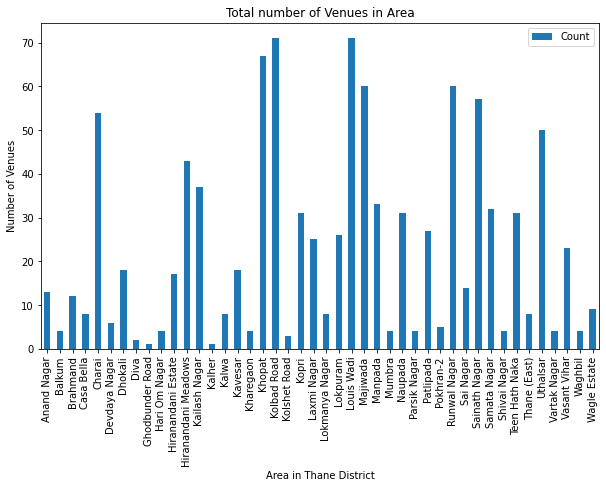

In [55]:
thane_venues_cnt.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Area in Thane District') # add to x-label to the plot
plt.ylabel('Number of Venues') # add y-label to the plot
plt.title('Total number of Venues in Area') # add title to the plot

plt.show()

Here we can see that some of areas has almost __70__ venues and some of them are even less than __10__. 
Venues list can be increased and decreased based on Radius size

##### Let's find out how many unique categories can be curated from all the returned venues

In [56]:
print('There are {} uniques categories.'.format(len(thane_venues['Venue Category'].unique())))

There are 98 uniques categories.


###### Analyze each venues in all the Area 

In [57]:
thane_onehot = get_onehot_encoding_data(thane_venues)
thane_onehot.head()

(1012, 99)


,Area,ATM,Antique Shop,Art Gallery,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bar,...,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Toy / Game Store,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Wine Shop
0,Anand Nagar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Anand Nagar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Anand Nagar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Anand Nagar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Anand Nagar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### Now, let's group rows by Area and by taking the mean of the frequency of occurrence of each category

In [58]:
thane_grouped = thane_onehot.groupby('Area').mean().reset_index()
print(thane_grouped.shape)
thane_grouped.head()

(44, 99)


,Area,ATM,Antique Shop,Art Gallery,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bar,...,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Toy / Game Store,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Wine Shop
0,Anand Nagar,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.076923,0.076923,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
1,Balkum,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.250000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
2,Brahmand,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.166667,0.0,0.083333
3,Casa Bella,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
4,Charai,0.0,0.0,0.0,0.018519,0.0,0.018519,0.018519,0.000000,0.000000,...,0.0,0.0,0.0,0.018519,0.0,0.0,0.0,0.018519,0.0,0.000000


##### Create the new dataframe and display the top 10 venues for each area.

In [59]:
thane_venues_sorted = get_sorted_venues(thane_grouped)
thane_venues_sorted.head()

(44, 11)


,Area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Anand Nagar,Shopping Mall,Food Court,Bar,Hotel,Coffee Shop,Sandwich Place,Clothing Store,Fast Food Restaurant,Sporting Goods Shop,Pizza Place
1,Balkum,Sandwich Place,Gym Pool,Grocery Store,Bakery,Wine Shop,Food Court,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant
2,Brahmand,Vegetarian / Vegan Restaurant,Wine Shop,Dessert Shop,Coffee Shop,Café,Bus Station,Burger Joint,Snack Place,Food,Pizza Place
3,Casa Bella,Gym Pool,Gym / Fitness Center,Golf Course,Shopping Mall,Movie Theater,Bus Station,Multiplex,Soccer Field,Wine Shop,Flea Market
4,Charai,Indian Restaurant,Ice Cream Shop,Coffee Shop,Chinese Restaurant,Clothing Store,Seafood Restaurant,Donut Shop,Sandwich Place,Fast Food Restaurant,Italian Restaurant


## Cluster Neighborhoods

K-means algorithm is used to cluster the area. K-Means algorithm is one of the most common cluster method
Show graph to identify number of cluster using distortions and inertias of K-Means

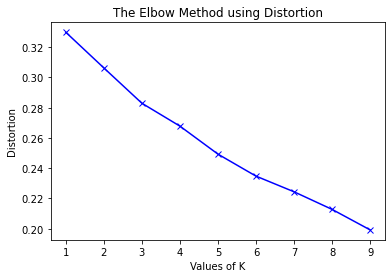

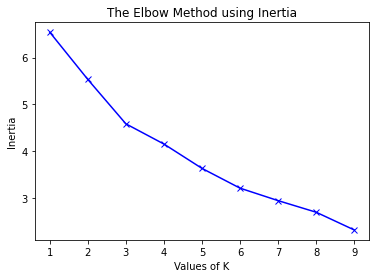

In [60]:
find_no_of_cluster(thane_grouped)

Run __k-means__ to cluster the area into defined clusters and create a new dataframe that includes the cluster as well as the _top 10 venues_ for each area.

In [61]:
kclusters = 5
thane_merged = get_clstr_mrgd_data(thane_grouped, thane_venues_sorted, thane_data, kclusters)
thane_merged.head()

K-Means Labels : [1 0 0 0 1 1 1 3 4 0]
(44, 18)


,Location,Area,Latitude,Longitude,1BHK,2BHK,3BHK,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Thane District,Anand Nagar,19.264739,72.960317,11262.5,17788.5,NaN,1,Shopping Mall,Food Court,Bar,Hotel,Coffee Shop,Sandwich Place,Clothing Store,Fast Food Restaurant,Sporting Goods Shop,Pizza Place
1,Thane District,Balkum,19.225776,72.987741,12898,17956.5,29219,0,Sandwich Place,Gym Pool,Grocery Store,Bakery,Wine Shop,Food Court,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant
2,Thane District,Brahmand,19.246965,72.981841,13164.5,15369.5,23675,0,Vegetarian / Vegan Restaurant,Wine Shop,Dessert Shop,Coffee Shop,Café,Bus Station,Burger Joint,Snack Place,Food,Pizza Place
3,Thane District,Casa Bella,19.167872,73.067937,7459,NaN,NaN,0,Gym Pool,Gym / Fitness Center,Golf Course,Shopping Mall,Movie Theater,Bus Station,Multiplex,Soccer Field,Wine Shop,Flea Market
4,Thane District,Charai,19.197979,72.970107,15286.5,NaN,NaN,1,Indian Restaurant,Ice Cream Shop,Coffee Shop,Chinese Restaurant,Clothing Store,Seafood Restaurant,Donut Shop,Sandwich Place,Fast Food Restaurant,Italian Restaurant


Now, we will estimate the number of __1st Most Common Venue__ in each cluster

In [62]:
thane_mrgd_onehot = get_1st_cmn_onehot(thane_merged)
thane_mrgd_onehot.head()

(44, 23)


,Cluster Labels,ATM,Asian Restaurant,Athletics & Sports,Big Box Store,Bookstore,Café,Chinese Restaurant,Clothing Store,Coffee Shop,...,Fast Food Restaurant,Gym Pool,Harbor / Marina,Hotel,Indian Restaurant,Multiplex,Pizza Place,Sandwich Place,Shopping Mall,Vegetarian / Vegan Restaurant
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


Let's group by one hot dataframe at cluster labels and resetting index

In [63]:
thane_mrgdgrouped = thane_mrgd_onehot.groupby('Cluster Labels').sum().reset_index()
print(thane_mrgdgrouped.shape)
thane_mrgdgrouped.head()

(5, 23)


,Cluster Labels,ATM,Asian Restaurant,Athletics & Sports,Big Box Store,Bookstore,Café,Chinese Restaurant,Clothing Store,Coffee Shop,...,Fast Food Restaurant,Gym Pool,Harbor / Marina,Hotel,Indian Restaurant,Multiplex,Pizza Place,Sandwich Place,Shopping Mall,Vegetarian / Vegan Restaurant
0,0,0,0,1,1,1,1,2,0,1,...,0,1,1,1,1,1,1,1,0,2
1,1,1,0,0,0,0,0,0,1,0,...,1,0,0,0,17,0,0,0,3,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### Create a bar chart which may help us to find proper labels for each cluster.

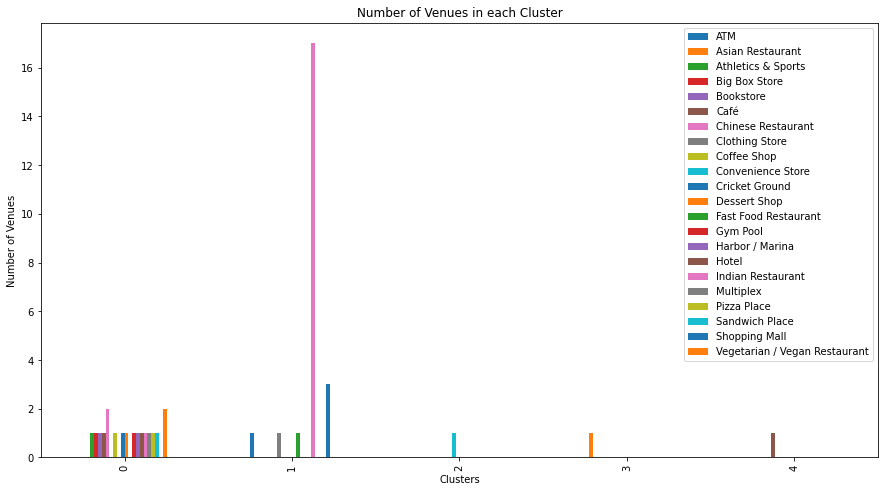

In [64]:
thane_mrgdgrouped.plot(x='Cluster Labels', kind='bar', figsize=(15, 8))

plt.xlabel('Clusters') # add to x-label to the plot
plt.ylabel('Number of Venues') # add y-label to the plot
plt.title('Number of Venues in each Cluster') # add title to the plot

plt.show()

##### Let's get the number of top 3 venues information for each area

In [65]:
# Let's group by one hot dataframe at Area and resetting index
thane_grouped_sum = thane_onehot.groupby('Area').sum().reset_index()
print(thane_grouped_sum.shape)
thane_grouped_sum.head()

(44, 99)


,Area,ATM,Antique Shop,Art Gallery,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bar,...,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Toy / Game Store,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Wine Shop
0,Anand Nagar,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,Balkum,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Brahmand,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,1
3,Casa Bella,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Charai,0,0,0,1,0,1,1,0,0,...,0,0,0,1,0,0,0,1,0,0


In [66]:
# Get dataframe with top venues for each area
thane_top_venue = get_top_venues(thane_grouped_sum)
thane_top_venue.head()

(44, 2)


,Area,TopVenues
0,Anand Nagar,"2 Shopping Mall, 1 Sporting Goods Shop, 1 Hotel"
1,Balkum,"1 Sandwich Place, 1 Bakery, 1 Gym Pool"
2,Brahmand,"2 Vegetarian / Vegan Restaurant, 1 Wine Shop, ..."
3,Casa Bella,"1 Bus Station, 1 Shopping Mall, 1 Movie Theater"
4,Charai,"8 Indian Restaurant, 4 Coffee Shop, 4 Ice Crea..."


###### Next, we will merge top venues and will create new column for Cluster Name to form a final dataframe having all the required details for a location

In [81]:
thane_merged_fnl = thane_merged.join(thane_top_venue.set_index('Area'), on='Area')
thane_merged_fnl['Cluster Name'] = thane_merged_fnl['Cluster Labels'].astype(str)
thane_merged_fnl["Cluster Name"].replace({"0": "Multiple Social Venues", "1": "Food and Clothing Venues"}, inplace=True)
thane_merged_fnl["Cluster Name"].replace({"2": "Sandwich and Convenience Store Venues", "3": "Veg & Asian Restaurant Venues"}, inplace=True)
thane_merged_fnl["Cluster Name"].replace({"4": "Cafe and Hotel Venues"}, inplace=True)
thane_merged_fnl.head(3)

,Location,Area,Latitude,Longitude,1BHK,2BHK,3BHK,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,TopVenues,Cluster Name
0,Thane District,Anand Nagar,19.264739,72.960317,11262.5,17788.5,NaN,1,Shopping Mall,Food Court,Bar,Hotel,Coffee Shop,Sandwich Place,Clothing Store,Fast Food Restaurant,Sporting Goods Shop,Pizza Place,"2 Shopping Mall, 1 Sporting Goods Shop, 1 Hotel",Food and Clothing Venues
1,Thane District,Balkum,19.225776,72.987741,12898,17956.5,29219,0,Sandwich Place,Gym Pool,Grocery Store,Bakery,Wine Shop,Food Court,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,"1 Sandwich Place, 1 Bakery, 1 Gym Pool",Multiple Social Venues
2,Thane District,Brahmand,19.246965,72.981841,13164.5,15369.5,23675,0,Vegetarian / Vegan Restaurant,Wine Shop,Dessert Shop,Coffee Shop,Café,Bus Station,Burger Joint,Snack Place,Food,Pizza Place,"2 Vegetarian / Vegan Restaurant, 1 Wine Shop, ...",Multiple Social Venues


##### Finally, let's visualize the resulting clusters of Thane District

In [82]:
show_clstr_map(kclusters, thane_merged_fnl)

__As of now, we created a final dataframe for Thane and we divided the area into different cluster based on K-Means clustering__

## 4. Results <a class="anchor" id="item4"></a>

Main aim of this project was to visualize area wise range of  Rent of different type of Flats in each location. Now we will work on visualizing the areas based on the rent of a flat in that area. We will see map for all 3 types of flats to specify which area is best suitable to choose as per need.

Map will also has the below informations for each area:
-  Area Name
-  Cluster Name
-  Top Venues (atmost 3 venues)
-  Rent Levels

### a) Data Formation and Visualization of 1-BHK flats in Thane district

In [83]:
# get dataframe with 1BHK rented flat only
drp_lst = ['2BHK', '3BHK']
df_mum_1bhk = get_rent_dtls(drp_lst, '1BHK', thane_merged_fnl)
df_mum_1bhk.head(3)

(44, 18)
(39, 18)


,Location,Area,Latitude,Longitude,Rent,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,TopVenues,Cluster Name
0,Thane District,Anand Nagar,19.264739,72.960317,11262.5,1,Shopping Mall,Food Court,Bar,Hotel,Coffee Shop,Sandwich Place,Clothing Store,Fast Food Restaurant,Sporting Goods Shop,Pizza Place,"2 Shopping Mall, 1 Sporting Goods Shop, 1 Hotel",Food and Clothing Venues
1,Thane District,Balkum,19.225776,72.987741,12898.0,0,Sandwich Place,Gym Pool,Grocery Store,Bakery,Wine Shop,Food Court,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,"1 Sandwich Place, 1 Bakery, 1 Gym Pool",Multiple Social Venues
2,Thane District,Brahmand,19.246965,72.981841,13164.5,0,Vegetarian / Vegan Restaurant,Wine Shop,Dessert Shop,Coffee Shop,Café,Bus Station,Burger Joint,Snack Place,Food,Pizza Place,"2 Vegetarian / Vegan Restaurant, 1 Wine Shop, ...",Multiple Social Venues


[ 3  4 10 17  5]
[ 5254.5  8112.7 10970.9 13829.1 16687.3 19545.5]


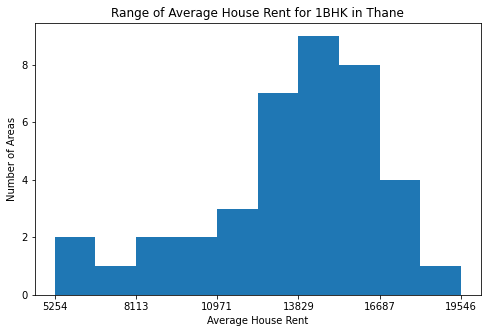

In [84]:
# Show histogram for 1BHK rent in Thane District
get_hist_grph(df_mum_1bhk, '1BHK', 'Thane')

In [85]:
# Get Rent Labels and Range
df_mum_1bhk = add_rent_dtls(df_mum_1bhk)
df_mum_1bhk.head(3)

(39, 20)


,Location,Area,Latitude,Longitude,Rent,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,TopVenues,Cluster Name,RentDescription,RentRange
0,Thane District,Anand Nagar,19.264739,72.960317,11262.5,1,Shopping Mall,Food Court,Bar,Hotel,Coffee Shop,Sandwich Place,Clothing Store,Fast Food Restaurant,Sporting Goods Shop,Pizza Place,"2 Shopping Mall, 1 Sporting Goods Shop, 1 Hotel",Food and Clothing Venues,Medium Rent,3
1,Thane District,Balkum,19.225776,72.987741,12898.0,0,Sandwich Place,Gym Pool,Grocery Store,Bakery,Wine Shop,Food Court,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,"1 Sandwich Place, 1 Bakery, 1 Gym Pool",Multiple Social Venues,Medium Rent,3
2,Thane District,Brahmand,19.246965,72.981841,13164.5,0,Vegetarian / Vegan Restaurant,Wine Shop,Dessert Shop,Coffee Shop,Café,Bus Station,Burger Joint,Snack Place,Food,Pizza Place,"2 Vegetarian / Vegan Restaurant, 1 Wine Shop, ...",Multiple Social Venues,Medium Rent,3


In [86]:
# Map showing rent distribution of 1BHK in Thane
show_map_rnt_wise(df_mum_1bhk)

### b) Data Formation and Visualization of 2-BHK flats in Thane district

In [87]:
# get dataframe with 2BHK rented flat only
drp_lst = ['1BHK', '3BHK']
df_mum_2bhk = get_rent_dtls(drp_lst, '2BHK', thane_merged_fnl)
df_mum_2bhk.head(3)

(44, 18)
(31, 18)


,Location,Area,Latitude,Longitude,Rent,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,TopVenues,Cluster Name
0,Thane District,Anand Nagar,19.264739,72.960317,17788.5,1,Shopping Mall,Food Court,Bar,Hotel,Coffee Shop,Sandwich Place,Clothing Store,Fast Food Restaurant,Sporting Goods Shop,Pizza Place,"2 Shopping Mall, 1 Sporting Goods Shop, 1 Hotel",Food and Clothing Venues
1,Thane District,Balkum,19.225776,72.987741,17956.5,0,Sandwich Place,Gym Pool,Grocery Store,Bakery,Wine Shop,Food Court,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,"1 Sandwich Place, 1 Bakery, 1 Gym Pool",Multiple Social Venues
2,Thane District,Brahmand,19.246965,72.981841,15369.5,0,Vegetarian / Vegan Restaurant,Wine Shop,Dessert Shop,Coffee Shop,Café,Bus Station,Burger Joint,Snack Place,Food,Pizza Place,"2 Vegetarian / Vegan Restaurant, 1 Wine Shop, ...",Multiple Social Venues


[ 1  1 10 16  3]
[ 5695.  10660.7 15626.4 20592.1 25557.8 30523.5]


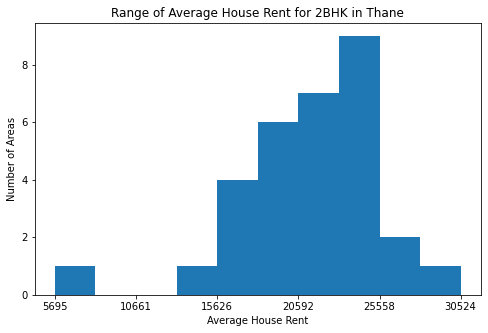

In [88]:
# Show histogram for 2BHK rent in Thane District
get_hist_grph(df_mum_2bhk, '2BHK', 'Thane')

In [89]:
# Function to get Rent Labels and Range
df_mum_2bhk = add_rent_dtls(df_mum_2bhk)
df_mum_2bhk.head(3)

(31, 20)


,Location,Area,Latitude,Longitude,Rent,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,TopVenues,Cluster Name,RentDescription,RentRange
0,Thane District,Anand Nagar,19.264739,72.960317,17788.5,1,Shopping Mall,Food Court,Bar,Hotel,Coffee Shop,Sandwich Place,Clothing Store,Fast Food Restaurant,Sporting Goods Shop,Pizza Place,"2 Shopping Mall, 1 Sporting Goods Shop, 1 Hotel",Food and Clothing Venues,Medium Rent,3
1,Thane District,Balkum,19.225776,72.987741,17956.5,0,Sandwich Place,Gym Pool,Grocery Store,Bakery,Wine Shop,Food Court,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,"1 Sandwich Place, 1 Bakery, 1 Gym Pool",Multiple Social Venues,Medium Rent,3
2,Thane District,Brahmand,19.246965,72.981841,15369.5,0,Vegetarian / Vegan Restaurant,Wine Shop,Dessert Shop,Coffee Shop,Café,Bus Station,Burger Joint,Snack Place,Food,Pizza Place,"2 Vegetarian / Vegan Restaurant, 1 Wine Shop, ...",Multiple Social Venues,Low Rent,2


In [90]:
# Map showing rent distribution of 2BHK in Thane
show_map_rnt_wise(df_mum_2bhk)

### c) Data Formation and Visualization of 3-BHK flats in Thane district

In [91]:
# Get dataframe with 3BHK rented flat only
drp_lst = ['1BHK', '2BHK']
df_mum_3bhk = get_rent_dtls(drp_lst, '3BHK', thane_merged_fnl)
df_mum_3bhk.head(3)

(44, 18)
(18, 18)


,Location,Area,Latitude,Longitude,Rent,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,TopVenues,Cluster Name
0,Thane District,Balkum,19.225776,72.987741,29219.0,0,Sandwich Place,Gym Pool,Grocery Store,Bakery,Wine Shop,Food Court,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,"1 Sandwich Place, 1 Bakery, 1 Gym Pool",Multiple Social Venues
1,Thane District,Brahmand,19.246965,72.981841,23675.0,0,Vegetarian / Vegan Restaurant,Wine Shop,Dessert Shop,Coffee Shop,Café,Bus Station,Burger Joint,Snack Place,Food,Pizza Place,"2 Vegetarian / Vegan Restaurant, 1 Wine Shop, ...",Multiple Social Venues
2,Thane District,Dhokali,19.225579,72.984544,26031.5,1,Shopping Mall,Pizza Place,Coffee Shop,Lounge,Pub,Clothing Store,Electronics Store,Fast Food Restaurant,Multiplex,Dessert Shop,"3 Shopping Mall, 2 Pizza Place, 2 Coffee Shop",Food and Clothing Venues


[5 5 5 1 2]
[22312.5 26456.4 30600.3 34744.2 38888.1 43032. ]


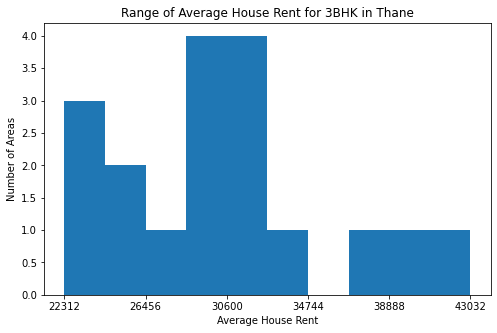

In [92]:
# Show histogram for 3BHK rent in Thane District
get_hist_grph(df_mum_3bhk, '3BHK', 'Thane')

In [93]:
# Get Rent Labels and Range
df_mum_3bhk = add_rent_dtls(df_mum_3bhk)
df_mum_3bhk.head(3)

(18, 20)


,Location,Area,Latitude,Longitude,Rent,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,TopVenues,Cluster Name,RentDescription,RentRange
0,Thane District,Balkum,19.225776,72.987741,29219.0,0,Sandwich Place,Gym Pool,Grocery Store,Bakery,Wine Shop,Food Court,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,"1 Sandwich Place, 1 Bakery, 1 Gym Pool",Multiple Social Venues,Low Rent,2
1,Thane District,Brahmand,19.246965,72.981841,23675.0,0,Vegetarian / Vegan Restaurant,Wine Shop,Dessert Shop,Coffee Shop,Café,Bus Station,Burger Joint,Snack Place,Food,Pizza Place,"2 Vegetarian / Vegan Restaurant, 1 Wine Shop, ...",Multiple Social Venues,Lowest Rent,1
2,Thane District,Dhokali,19.225579,72.984544,26031.5,1,Shopping Mall,Pizza Place,Coffee Shop,Lounge,Pub,Clothing Store,Electronics Store,Fast Food Restaurant,Multiplex,Dessert Shop,"3 Shopping Mall, 2 Pizza Place, 2 Coffee Shop",Food and Clothing Venues,Lowest Rent,1


In [94]:
# Map showing rent distribution of 3BHK in Thane
show_map_rnt_wise(df_mum_3bhk)

## 5. Discussion <a class="anchor" id="item5"></a>

While getting coordinates using __geocoder__, it was found that most of coordinates for different areas were incorrect. Coordinates of each those areas need to be captured from Google Maps individually. __K-Means__ algorithm was used as part of clustering, while testing the Elbow method,  optimum k value was set to __5__.

Venue details were fetched using __Foursquare API__. Limited venues was fetched for multiple areas, even though _radius_ value was set __1000__.

Problem statement was closed by visualizing the data and clustering information on the Thane map.

## 6. Conclusion <a class="anchor" id="item6"></a>

People who are planning to stay in big cities to start a business or to work into some other firms. They can achieve better outcomes through their access to the platforms where such information is provided.

##### Below activities were done for Thane District:
-  Searching of near by Venues for all the areas using Foursquare API
-  Identification of total Venues in each area using Bar Chart
-  One-hot encoding using get_dummies of pandas
-  Segmentation & Clustering of data using K-Means Algorithm
-  Map representation of cluster distribution of each area using Folium
-  Defining Rent range using histogram for all type of Flats
-  Map representaton of Rent in different area using LinearColormap function of branca.colormap for color combination

#### NOTE: Same activities can be done for other Locations of Mumbai

## 7. References <a class="anchor" id="item7"></a>

-  <a href="https://www.coordinatesfinder.com/"> Coordinatesfinder </a>
-  <a href="https://www.99acres.com/property-rates-and-price-trends-in-mumbai#"> 99 acres </a>
-  <a href="https://www.google.co.in/maps/"> Google Maps </a>
-  <a href="https://developer.foursquare.com/"> Foursquare API </a>